In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [3]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [4]:
dotants = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\probe_data.pkl')
dot = dotants['dopant']
dot

0       Ag
1       Ag
2       Ag
3       Ag
4       Ag
        ..
3445    Zr
3446    Zr
3447    Zr
3448    Zr
3449    Zr
Name: dopant, Length: 3450, dtype: object

In [5]:
dot = np.unique(dot)
dot = dot.tolist()
dot.remove('Hf')
print(dot)

['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'C', 'Ca', 'Cd', 'Ce', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'H', 'Hg', 'In', 'Ir', 'K', 'La', 'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'Os', 'P', 'Pb', 'Pd', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tc', 'Ti', 'Tl', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr']


In [6]:
from matminer.featurizers.structure import PartialRadialDistributionFunction

prdf = PartialRadialDistributionFunction(cutoff = 20, bin_size = 0.5, include_elems=['Hf', 'O'], exclude_elems=dot)
df = prdf.fit_featurize_dataframe(df, 'structure')
df

,structure,name,Hf-Hf PRDF r=0.00-0.50,Hf-Hf PRDF r=0.50-1.00,Hf-Hf PRDF r=1.00-1.50,Hf-Hf PRDF r=1.50-2.00,Hf-Hf PRDF r=2.00-2.50,Hf-Hf PRDF r=2.50-3.00,Hf-Hf PRDF r=3.00-3.50,Hf-Hf PRDF r=3.50-4.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.092170,0.047391,...,0.055107,0.062309,0.062979,0.060304,0.052998,0.058736,0.069105,0.066106,0.044625,0.061557
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.100902,0.043016,...,0.064922,0.052085,0.072264,0.054968,0.053900,0.061388,0.062251,0.059881,0.061669,0.056598
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,0.0,0.0,0.0,0.001087,0.160830,0.101182,0.089280,0.087315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.0,0.0,0.0,0.000000,0.168740,0.081299,0.056671,0.106824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.090230,0.045204,...,0.055043,0.062229,0.062263,0.060197,0.054886,0.056100,0.069284,0.066318,0.045014,0.061532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.0,0.0,0.0,0.000000,0.177419,0.076954,0.055140,0.096058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.082710,0.040966,...,0.057523,0.055974,0.065088,0.062572,0.049204,0.056573,0.061132,0.068242,0.050168,0.051587
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.086470,0.038141,...,0.061073,0.055172,0.064222,0.061119,0.050207,0.055974,0.059758,0.065695,0.056637,0.053984
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,0.0,0.0,0.0,0.008603,0.153937,0.095318,0.060153,0.105005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
pd.to_pickle(df, r'C:\Python\Projects\crystal-phase-prediction\pkl_files\df_prdf_hfo2_del.pkl')

In [8]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [9]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,Hf-Hf PRDF r=0.00-0.50,Hf-Hf PRDF r=0.50-1.00,Hf-Hf PRDF r=1.00-1.50,Hf-Hf PRDF r=1.50-2.00,Hf-Hf PRDF r=2.00-2.50,Hf-Hf PRDF r=2.50-3.00,Hf-Hf PRDF r=3.00-3.50,Hf-Hf PRDF r=3.50-4.00,Hf-Hf PRDF r=4.00-4.50,Hf-Hf PRDF r=4.50-5.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.092170,0.047391,0.007949,0.003183,...,0.055107,0.062309,0.062979,0.060304,0.052998,0.058736,0.069105,0.066106,0.044625,0.061557
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.100902,0.043016,0.002271,0.005911,...,0.064922,0.052085,0.072264,0.054968,0.053900,0.061388,0.062251,0.059881,0.061669,0.056598
2,0.0,0.0,0.0,0.001087,0.160830,0.101182,0.089280,0.087315,0.097462,0.081602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.168740,0.081299,0.056671,0.106824,0.168242,0.011869,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.090230,0.045204,0.007041,0.002819,...,0.055043,0.062229,0.062263,0.060197,0.054886,0.056100,0.069284,0.066318,0.045014,0.061532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.0,0.0,0.0,0.000000,0.177419,0.076954,0.055140,0.096058,0.186292,0.002349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1721,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.082710,0.040966,0.017602,0.007928,...,0.057523,0.055974,0.065088,0.062572,0.049204,0.056573,0.061132,0.068242,0.050168,0.051587
1722,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.086470,0.038141,0.016502,0.007047,...,0.061073,0.055172,0.064222,0.061119,0.050207,0.055974,0.059758,0.065695,0.056637,0.053984
1723,0.0,0.0,0.0,0.008603,0.153937,0.095318,0.060153,0.105005,0.124317,0.048745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.91198283, 0.70147679,
        0.95679746],
       [0.        , 0.        , 0.        , ..., 0.82611241, 0.96940928,
        0.8797067 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.90632319, 0.89029536,
        0.83908046],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


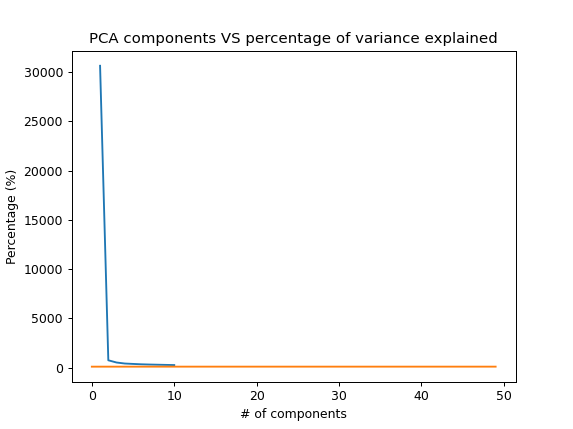

In [12]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([97.6, 98.5, 98.9, 99.1, 99.3, 99.4, 99.5, 99.6, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7])

In [14]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [15]:
pca = PCA(n_components=5)
PCA = pca.fit_transform(X)

In [16]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [17]:
from sklearn import metrics
metrics.silhouette_score(X, PCA_labels, metric='l1')

0.45543706267470946

In [18]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
#dfPCA.columns = ['x1','x2','x3','cluster', 'labels']
dfPCA.head(30)

,0,1,2,3,4,cluster,labels
0,4.518904,0.037493,0.535982,-0.240493,0.046309,0,m
1,4.514981,-0.039852,-0.387697,-0.183843,0.040220,2,o
2,-3.915965,-0.473517,0.010524,-0.098744,-0.295486,3,p-o
3,-3.924972,0.761285,-0.008530,-0.086751,-0.120875,1,t
4,4.544071,0.044196,0.429556,-0.117189,0.037061,0,m
5,-3.882742,-0.524855,0.007859,-0.070602,-0.331592,3,p-o
6,-3.895876,0.191167,-0.012375,0.043663,0.132017,3,unknown
7,4.506285,0.039180,0.332625,-0.182927,0.080058,0,m
8,4.536850,0.016503,-0.294388,-0.097722,0.050761,2,o
9,-3.893157,-0.548648,0.007111,-0.020146,-0.017773,3,p-o


In [19]:
dfPCA = dfPCA.replace({'m': 0, 'p-o': 3, 'o': 2, 't': 1, 'unknown': 3})

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(dfPCA['labels'], dfPCA['cluster'])

0.856231884057971

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfPCA['labels'], dfPCA['cluster'])

array([[359,   0,   1,   0, 100],
       [  0, 214,   0,  31,   0],
       [  1,   0, 271,   0,  73],
       [  0,  42,   0, 633,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [22]:
from sklearn.manifold import TSNE
#X1 = dfPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=3).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = PCA_labels
dftsne['labels'] = labels_true
#dftsne.columns = ['x1','x2', 'x3','cluster', 'labels']
dftsne

,0,1,2,cluster,labels
0,-7.023438,-6.768892,7.061200,0,m
1,8.833109,7.185252,-13.494447,2,o
2,8.395319,3.513608,13.326269,3,p-o
3,-8.235422,0.350726,-13.301541,1,t
4,-10.452199,-9.934280,11.167878,0,m
...,...,...,...,...,...
1720,-7.915574,-4.709657,-9.283399,1,t
1721,2.686751,-10.363235,-2.496665,4,m
1722,11.816608,-6.391605,-4.580192,2,o
1723,-9.101015,9.854812,-3.315847,3,unknown


In [23]:
dftsne2D = dftsne[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dftsne2D, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Predicted Clusters with 83% representation", fontsize=10)

KeyError: "['x2', 'x1'] not in index"

In [ ]:
# dftsne.drop(columns = ['cluster'])
dftsne2D_true = dftsne[['x1', 'x2', 'labels']]

lm = sns.lmplot(data=dftsne2D_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth with 83% representation", fontsize=11)

In [ ]:
import plotly.express as px
dftsne3D = dftsne[['x1', 'x2', 'x3' ,'cluster']]

fig = px.scatter_3d(
    dftsne3D, x='x1', y='x2', z='x3', color=dftsne3D['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [ ]:
import plotly.express as px
dftsne3D = dftsne[['x1', 'x2', 'x3' ,'cluster']]

fig = px.scatter_3d(
    dftsne3D, x='x1', y='x2', z='x3', color=dftsne['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [25]:
dftsne.head(30)

,0,1,2,cluster,labels
0,-7.023438,-6.768892,7.061200,0,m
1,8.833109,7.185252,-13.494447,2,o
2,8.395319,3.513608,13.326269,3,p-o
3,-8.235422,0.350726,-13.301541,1,t
4,-10.452199,-9.934280,11.167878,0,m
5,9.542232,2.379650,12.013495,3,p-o
6,-11.574899,4.001348,-4.215235,3,unknown
7,-9.362182,-13.075922,8.026534,0,m
8,8.560905,6.994837,-11.618649,2,o
9,7.191057,9.771426,9.724514,3,p-o


In [26]:
dftsne = dftsne.replace({'m': 0, 'p-o': 3, 'o': 2, 't': 1, 'unknown': 3})

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])

0.856231884057971

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dftsne['labels'], dftsne['cluster'])

array([[359,   0,   1,   0, 100],
       [  0, 214,   0,  31,   0],
       [  1,   0, 271,   0,  73],
       [  0,  42,   0, 633,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)